<a href="https://colab.research.google.com/github/SaionaraAraujo/Curso-DS-Sigmoidal/blob/master/Machine%20Learning/Primeiro_Modelo_de_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regressão Linear

##Introdução

A regressão linear é uma técnica estatística que permite modelar a relação entre uma variável dependente (ou resposta) e uma ou mais variáveis independentes (ou explicativas) contínuas. Ela é usada para prever valores da variável dependente com base nos valores conhecidos das variáveis independentes. Faz parte dos algoritmos de modelos de aprendizado Supervisonado do grande universo de Machine Learning.

A regressão linear é chamada assim porque assume que a relação entre as variáveis é linear, ou seja, pode ser representada por uma linha reta em um gráfico. A equação da linha é dada por:


> y = β0 + β1*x1 + ε


onde y é a variável dependente que queremos prever, x1 é a variável independente, β0 e β1 são os parâmetros da linha (intercepto e inclinação, respectivamente), que estimam a relação entre x e y, e ε é o erro aleatório - que deve ser observado e tratado.

O objetivo da regressão linear é encontrar os valores de β0 e β1 que melhor se ajustam aos dados observados, de modo a minimizar a soma dos quadrados dos erros entre as previsões da linha e os valores reais. Esse processo é chamado de ajuste de modelo.


A regressão linear pode ser usada para uma variedade de fins, incluindo previsão, controle de qualidade, análise de correlação e identificação de fatores de risco. No entanto, ela pressupõe que as relações entre as variáveis são lineares e que os erros são independentes e têm distribuição normal. Portanto, é importante verificar essas suposições antes de utilizar a regressão linear.



##Objetivo

Depois dessa breve introdução sobre o assunto, é hora de por a mão na massa e construir nosso primeiro modelo.

No caso do nosso objetivo, que é prever o custo do plano de saúde, usaremos a regressão linear para encontrar a relação entre as características dos pacientes e o custo do plano. As características que usaremos para prever o custo incluem idade, sexo, índice de massa corporal (IMC), número de filhos, e fumante ou não. A partir dessas informações, o modelo de regressão linear será capaz de prever o custo do plano com base nas características de um novo paciente.


#Preparando o ambiente

##Carregando e conhecendo os dados

In [ ]:
import pandas as pd
#Carregando os dados
dados = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

Depois de importar os dados, é importante ter uma visão prévia dos dados, para entender como se comportam, quais os tipos apresentados, qual o tamanho do conjunto e partir disso, conseguir fazer uma análise mais precisa.

In [ ]:
#Conhecendo os dados
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Tamanho do conjunto de dados
dados.shape

(1338, 7)

Com o código acima, nos é informado em uma tupla a quantidade de linhas (1338) e colunas (7), respectivamente. A seguir, um dicionário com o siginificado de cada coluna, foi escrito para facilitar o entendimento.

##Dicionário de Dados

* age - Idade
* sex - gênero
* bmi - IMC
* children - quantidade de filhos
* smoker - se é fumante ou não
* region - região onde reside
* charges - custo com saúde

Já com consciência do significado das colunas, agora é preciso saber o tipo de dado que compõe cada uma delas. Para isso, vamos usar a função `info()`.

In [ ]:
#Identificar o tipo dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


A maioria dos dados deste conjunto são numéricos, sendo apenas duas colunas do tipo `object`. Para as variáveis numéricas podemos usar o método `describe()` e analisar as informações estatísticas descritivas básicas.

##Estatística Descritiva

In [ ]:
#Analisar as estatísticas das variáveis numéricas
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Com essas informações, sabemos que a idade média informada neste conjunto de dados é 39 anos, mas o desvio padrão é 14, o que talvez indique que os dados, para esta coluna, são muito variados. Outra variável também com valores variados, é a Charges, que tem o valor mínimo de, aproximadamente, 1121 e máximo de, aproximadamente, 63770. Um ponto importante a se observar, e poder refletir sobre o tipo de distribuição desta variável, é o quão longe a mediana está da média. 

Para esclarecer estas questões, e outras mais que surgirem, vamos realizar uma análise exploratória destes dados.

#Análise Exploratória

No caso deste trabalho, que tem por objetivo principal gerar um modelo de regressão linear, vamos utilizar uma biblioteca do Python para gerar essa análise, mas considerando que será uma análise um pouco mais fechada, com pouca chance de alterações, mas que será suficiente para entendermos os dados aqui utlizados.

A biblioteca utilizada será a sweetviz, que não é nativa do colab, por tanto precisa ser instalada para que seja possível importá-la.

In [ ]:
!pip install sweetviz -q

In [ ]:
import sweetviz as sv

Depois de importar a biblioteca, agora é possível gerar um relatório com base nos dados do conjunto, e com uma variável alvo para ser analisada. Essa biblioteca permite algumas personalizações, porém não faremos para que o foco seja apenas em conhecer mais sobre os dados aqui utilizados.

In [ ]:
eda = sv.analyze(source = dados, target_feat= 'charges')

                                             |          | [  0%]   00:00 -> (? left)


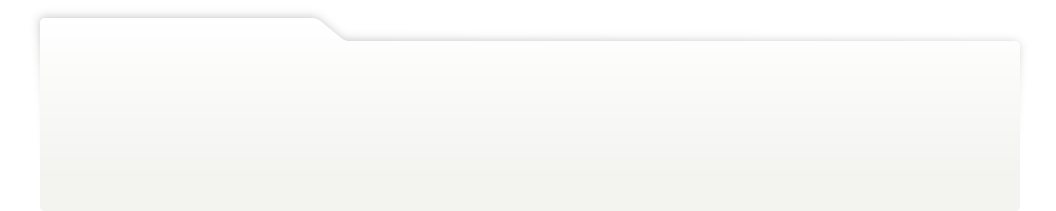
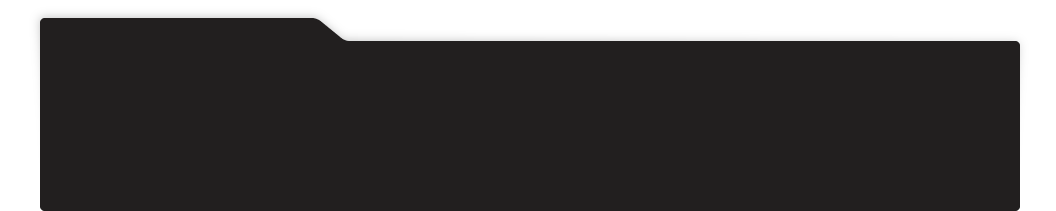
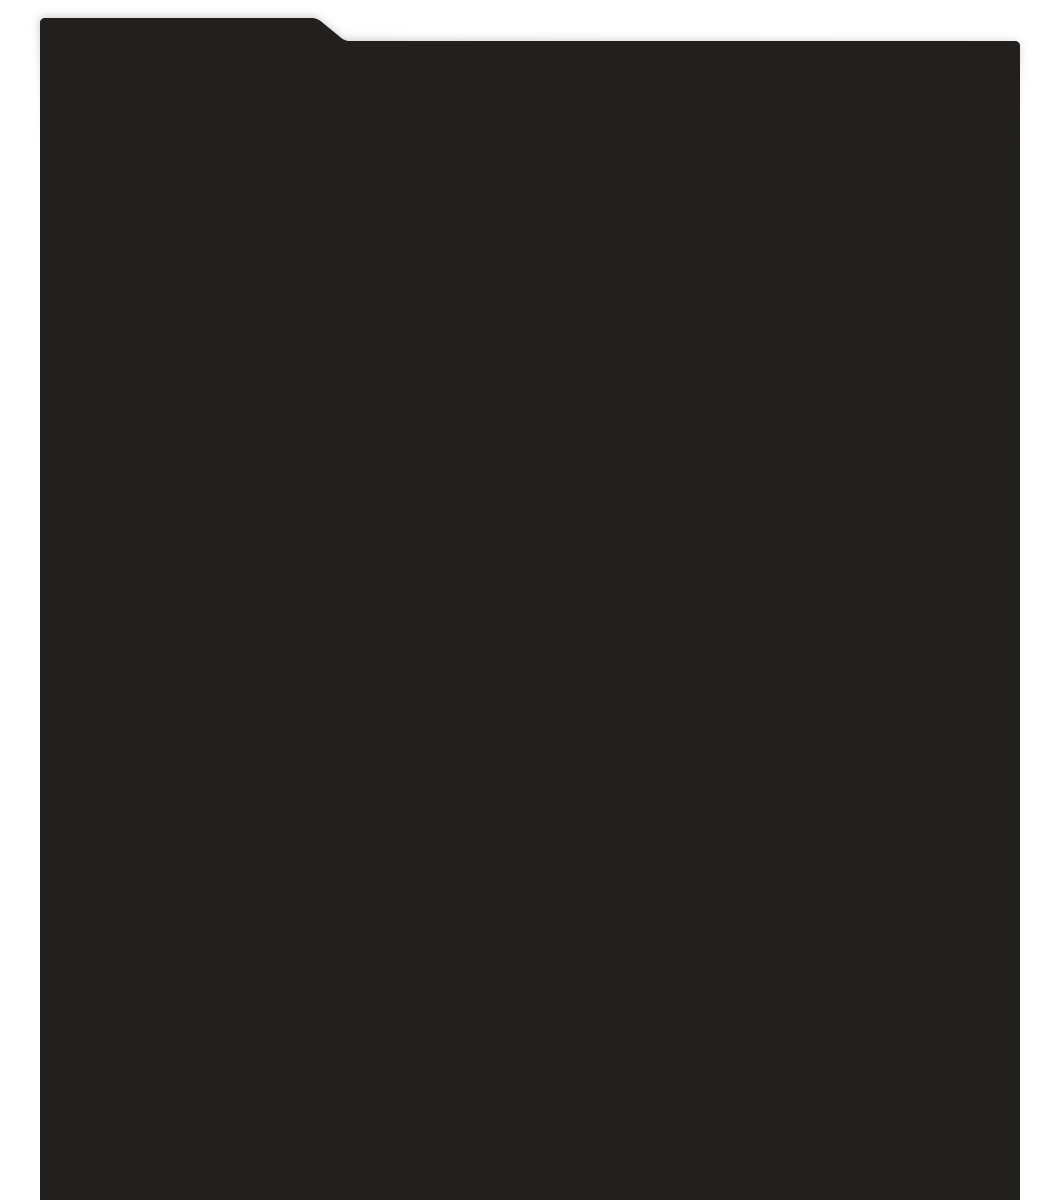
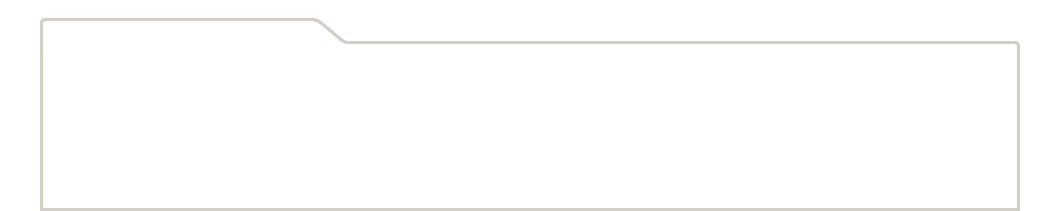
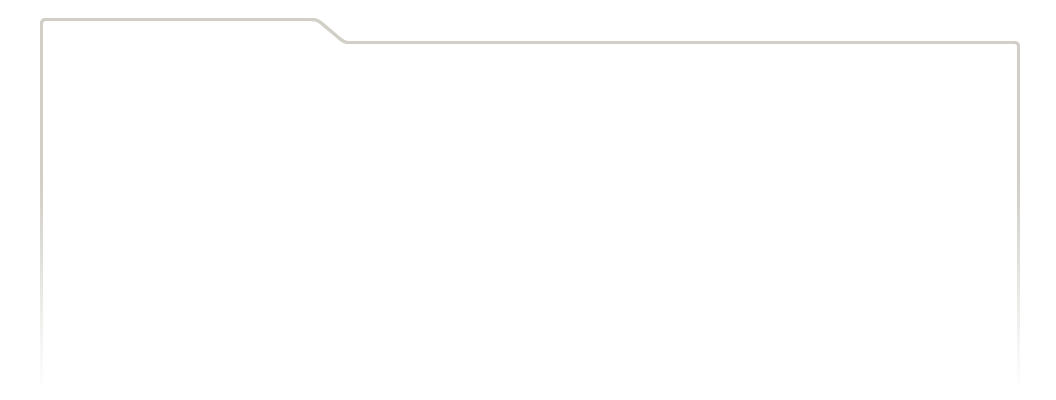
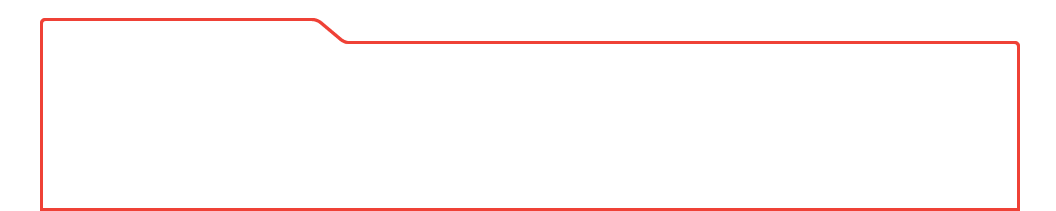
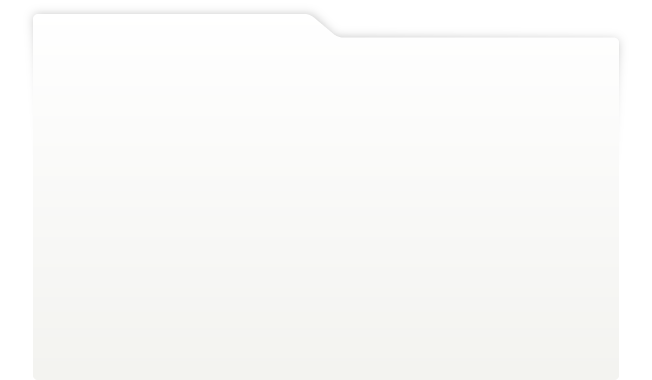
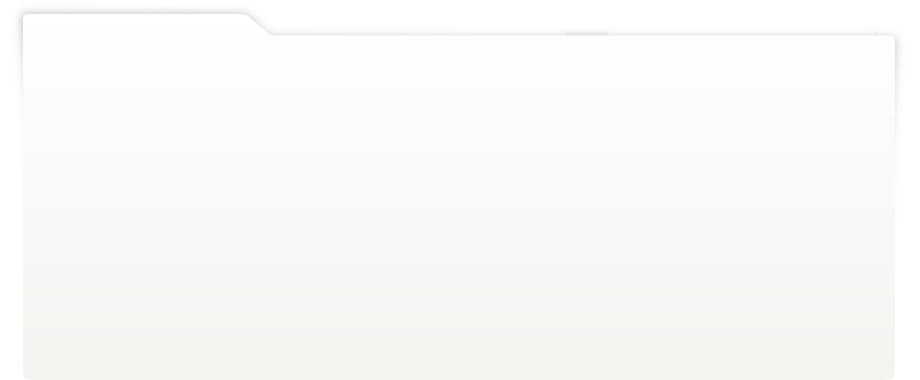
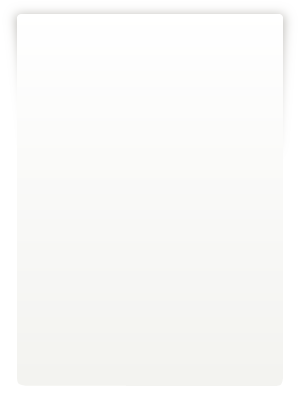
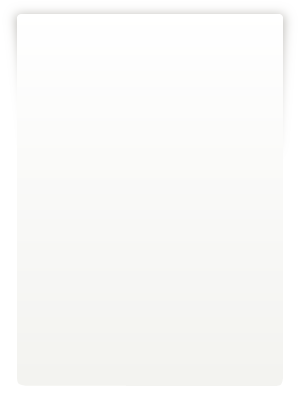
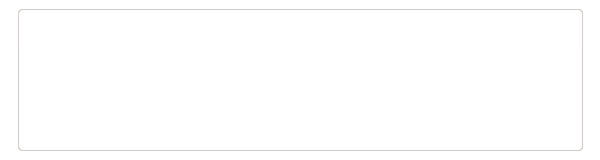
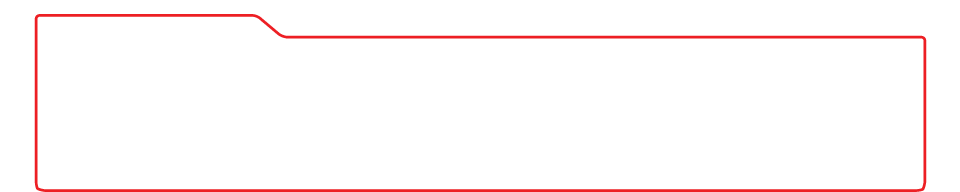
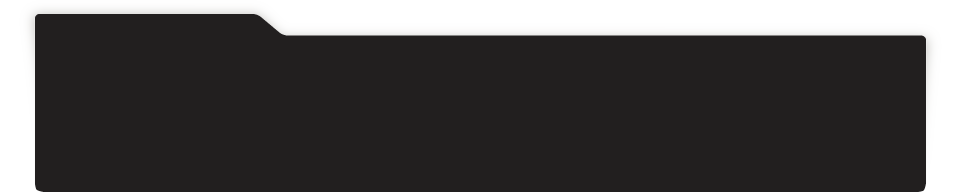
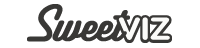
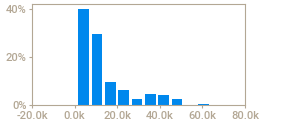
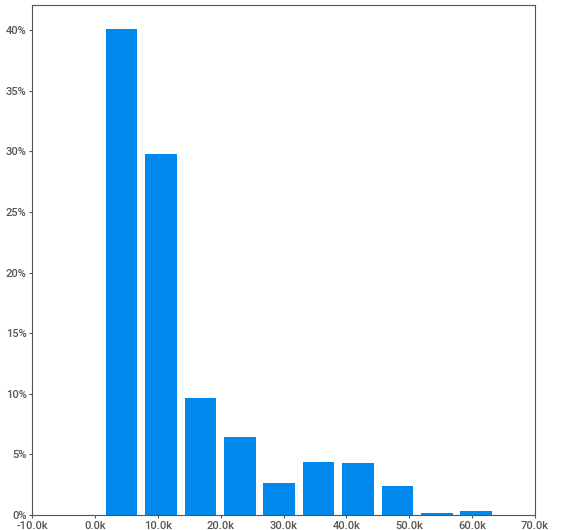
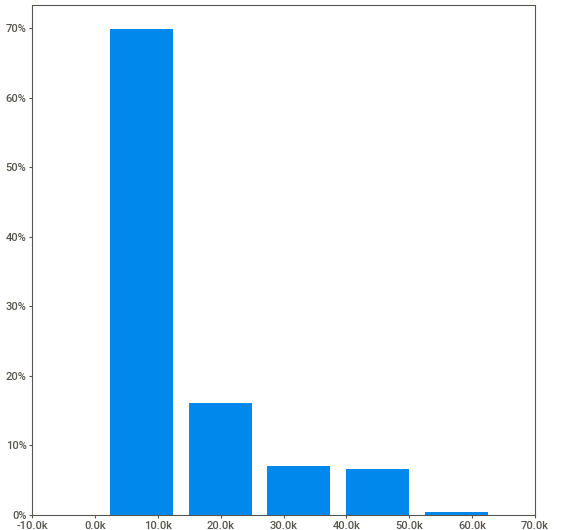
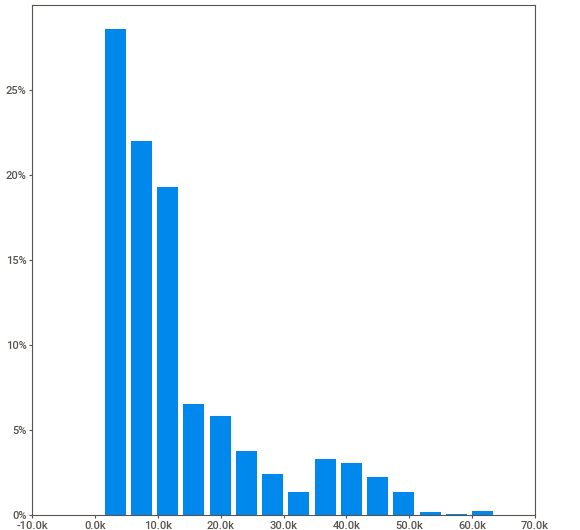
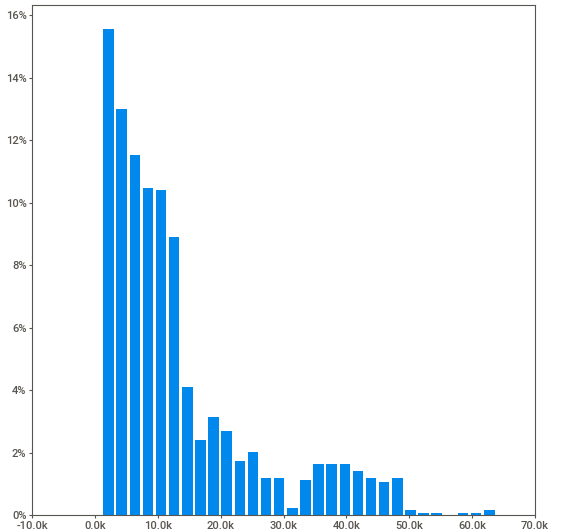
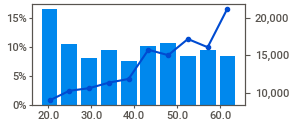
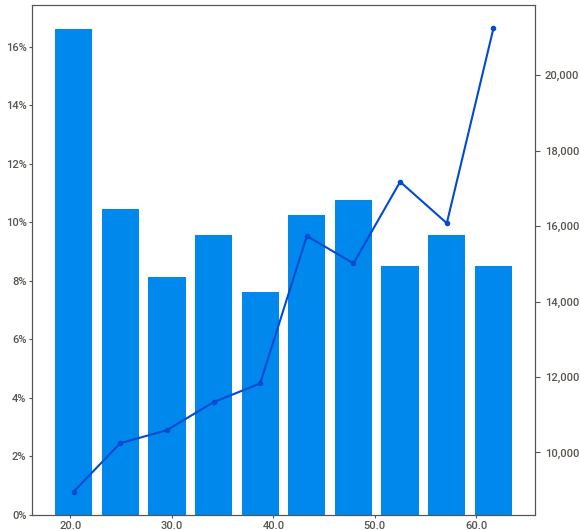
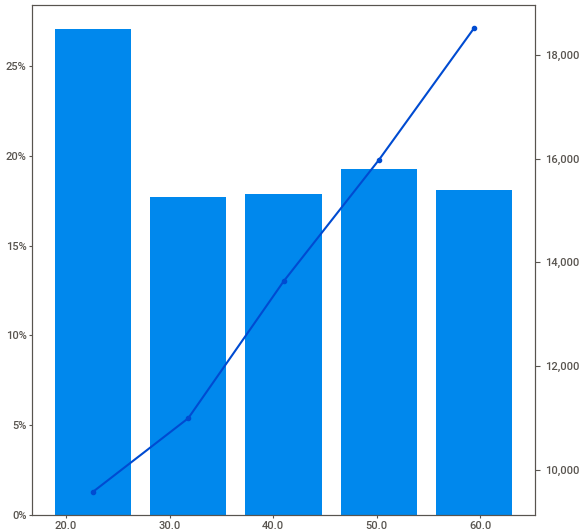
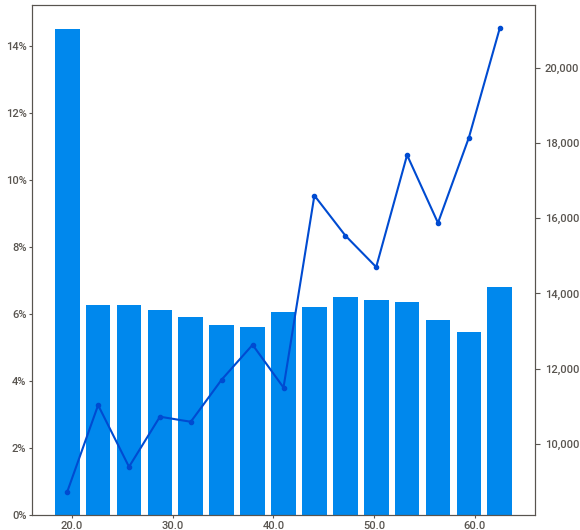
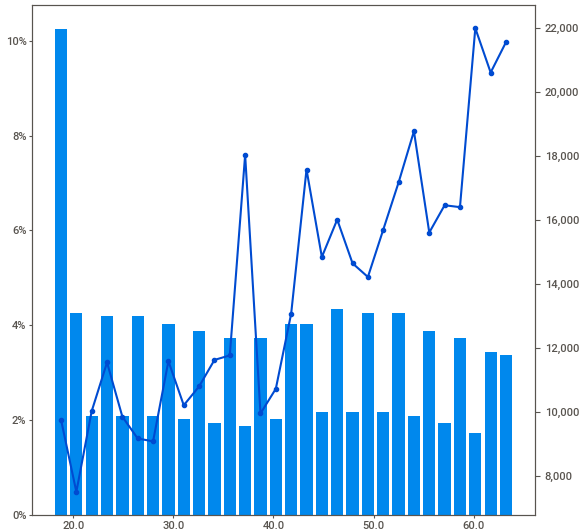
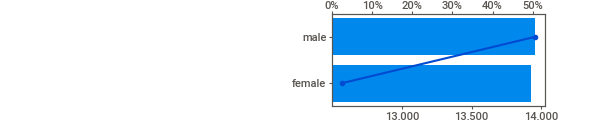
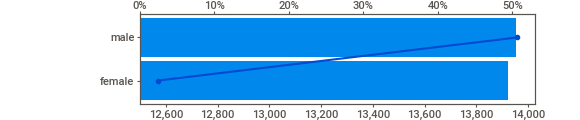
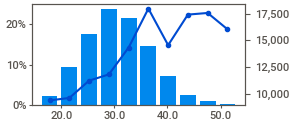
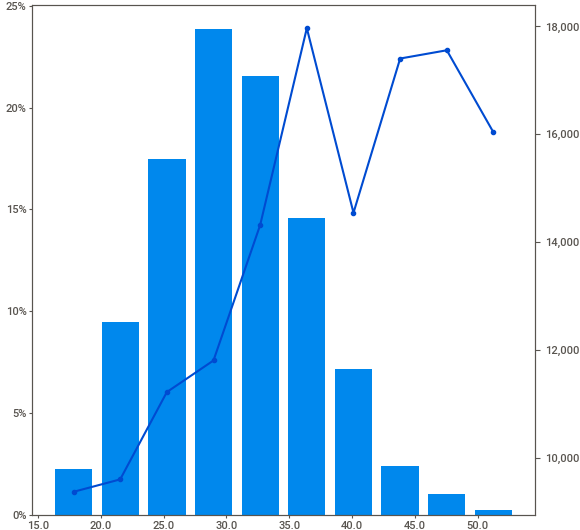
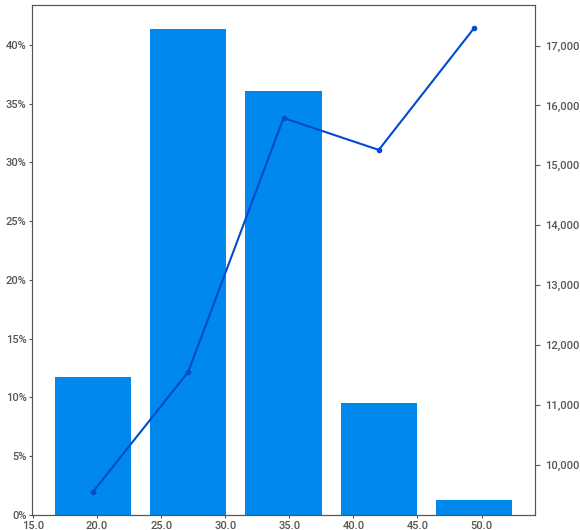
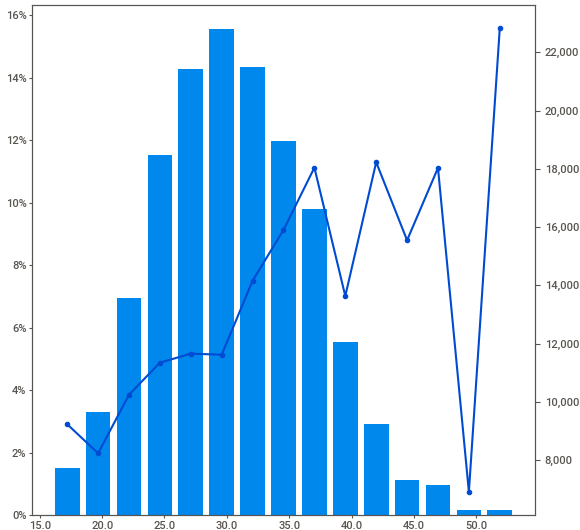
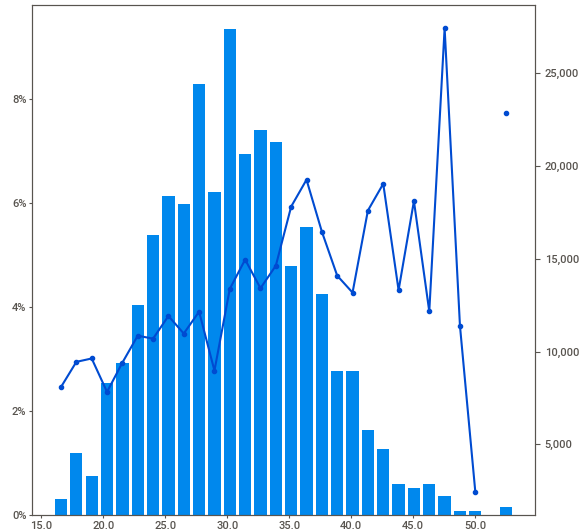
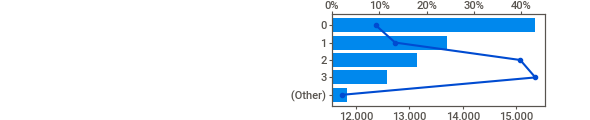
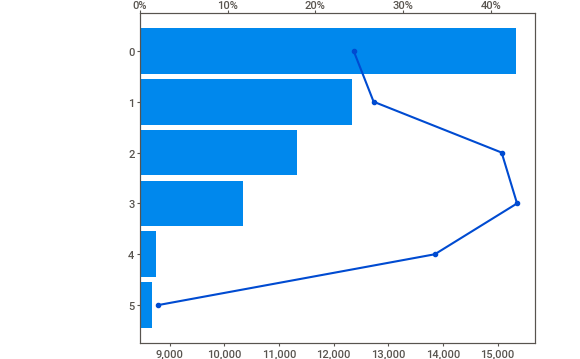
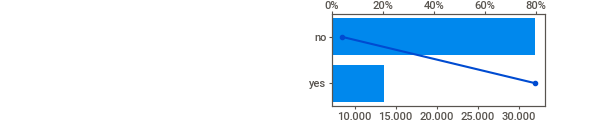
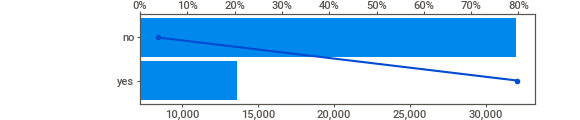
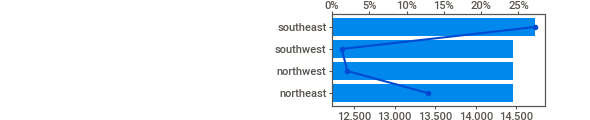
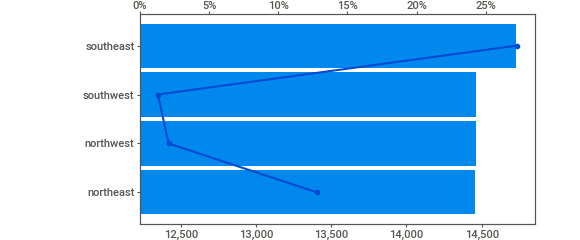
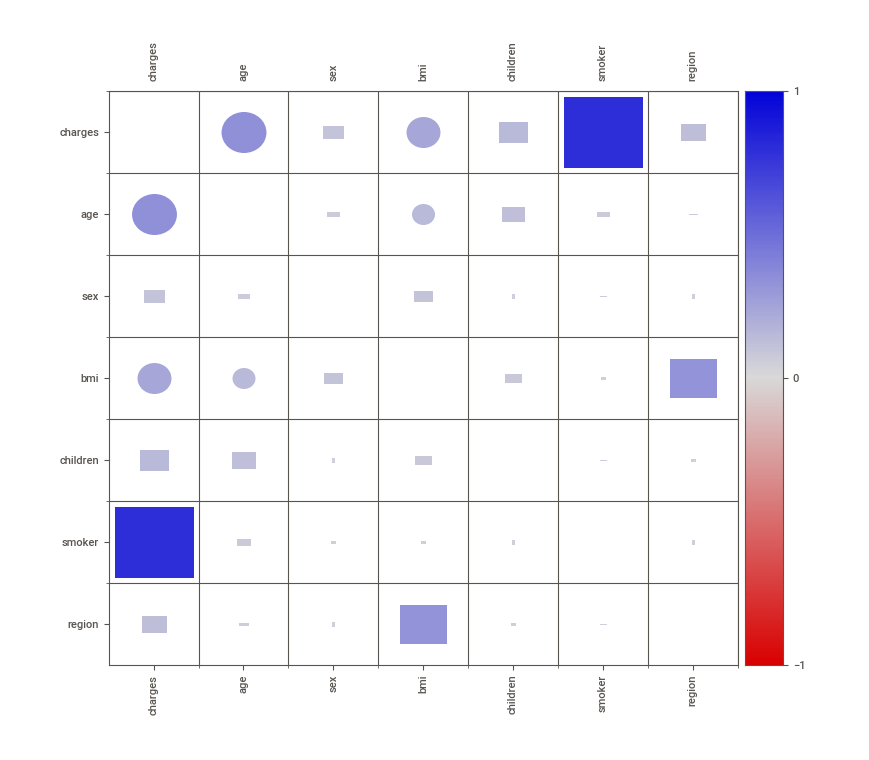
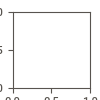

In [ ]:
eda.show_notebook()

In [ ]:
eda2 = sv.compare_intra(source_df=dados,
                        condition_series=dados['smoker'] == 'yes',
                        names = ['Fumante', 'Não Fumante'],
                        target_feat='charges')

                                             |          | [  0%]   00:00 -> (? left)


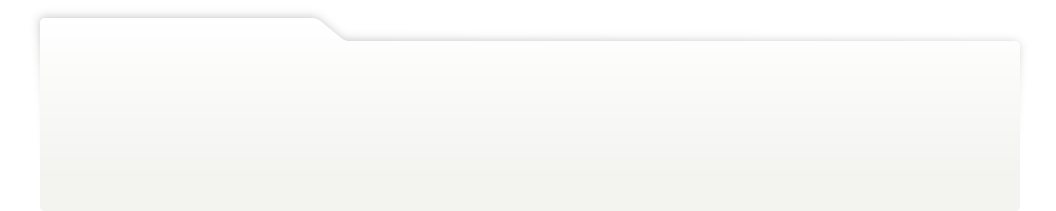
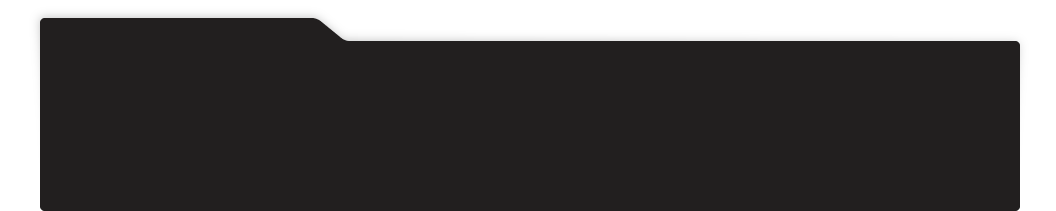
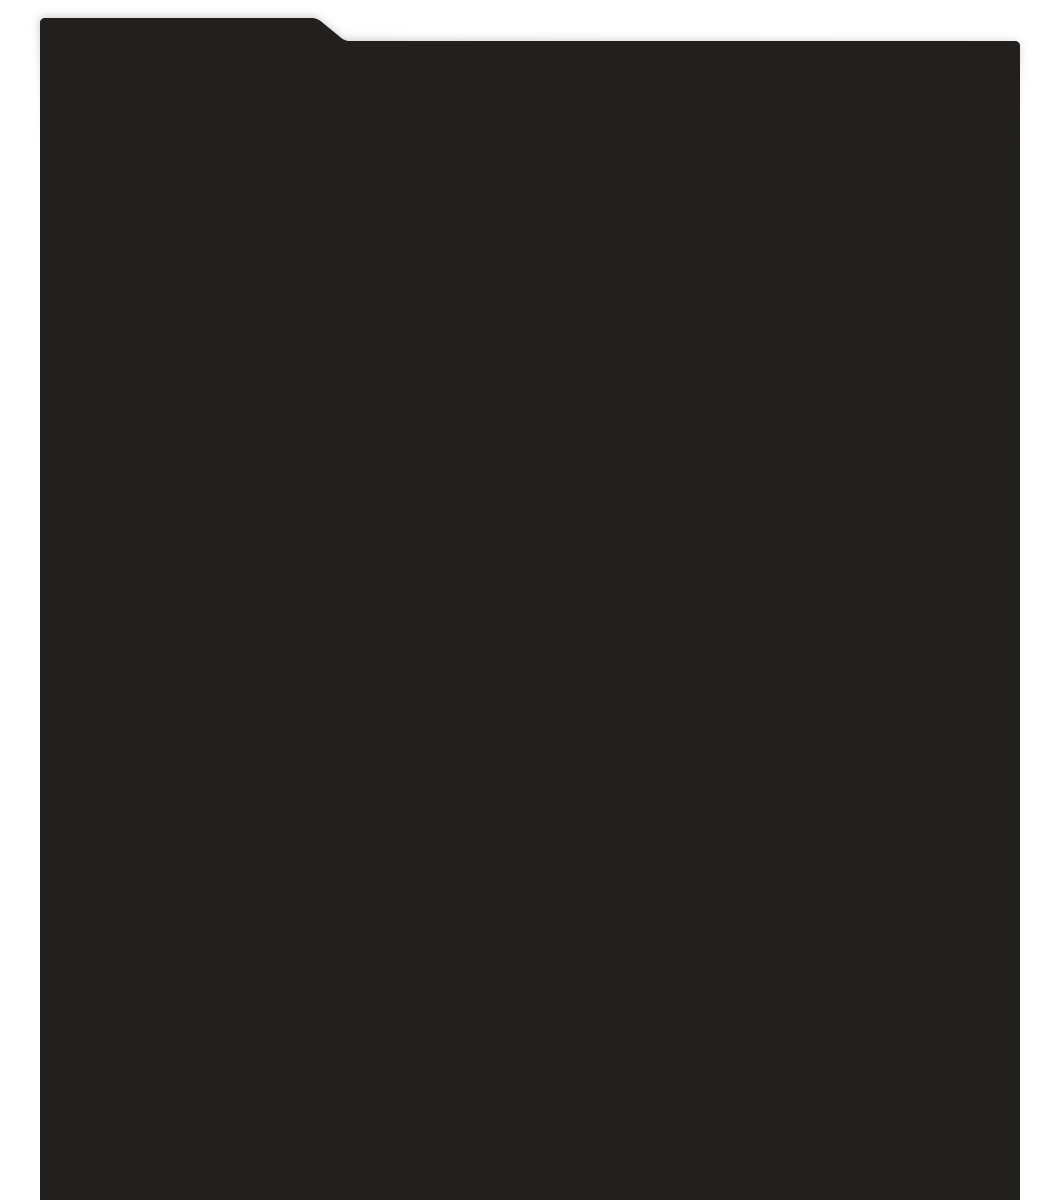
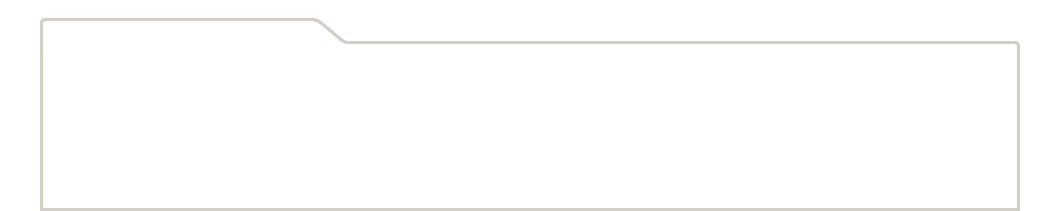
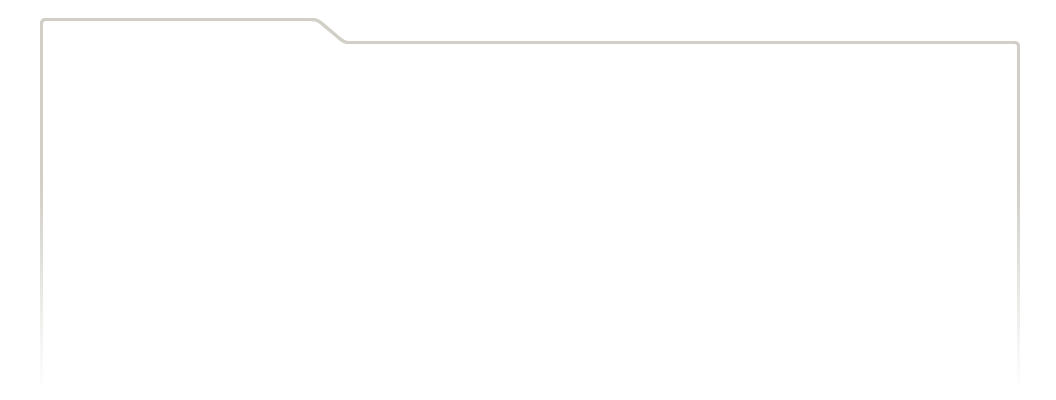
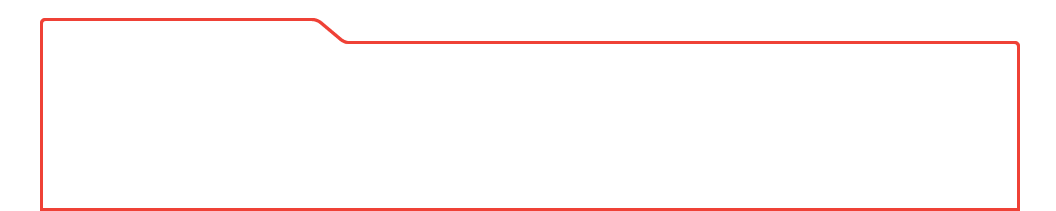
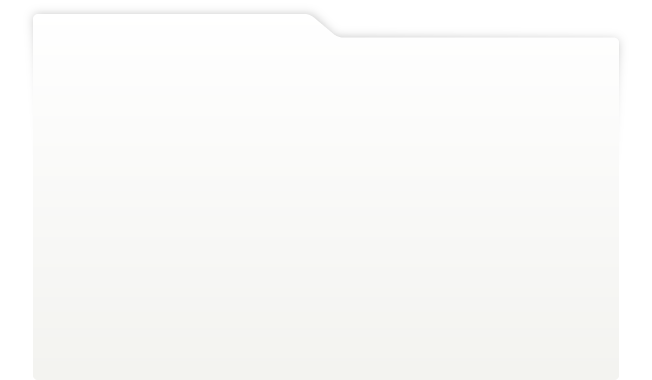
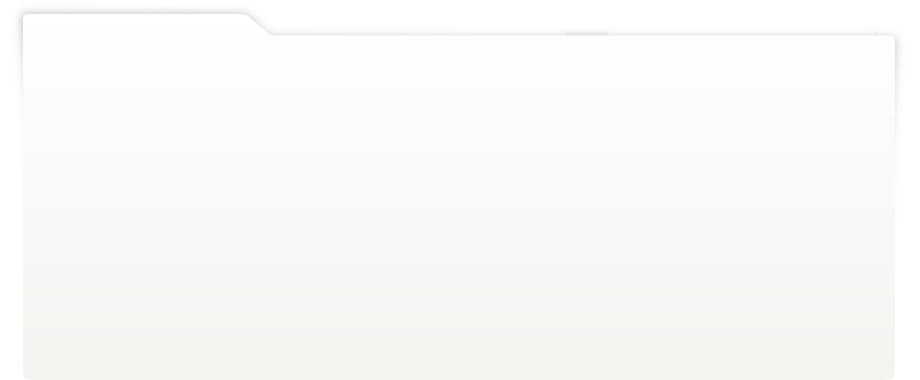
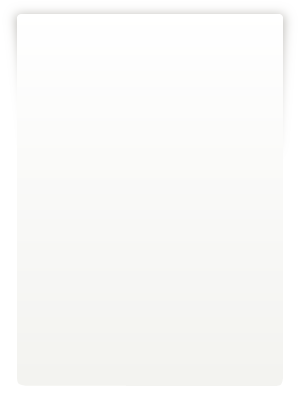
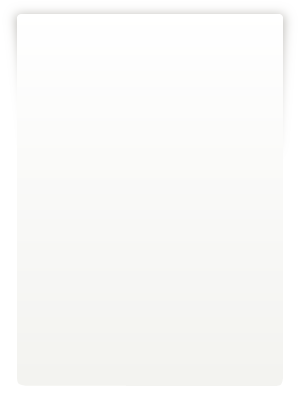
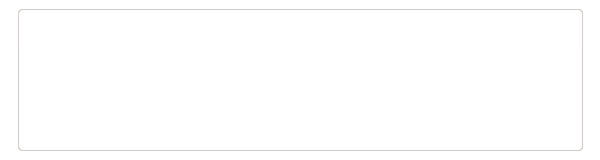
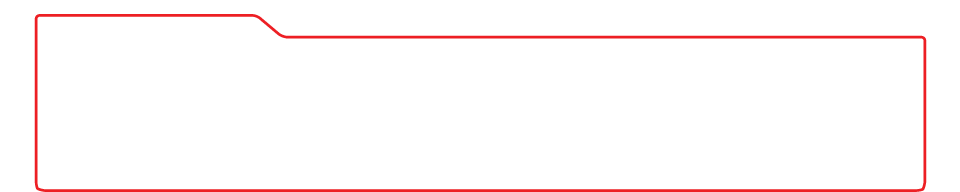
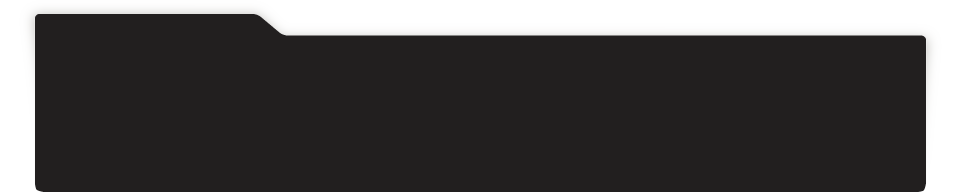
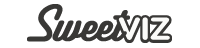
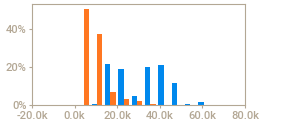
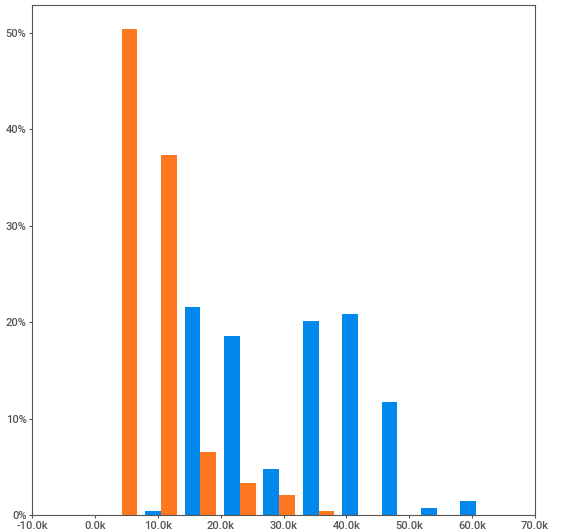
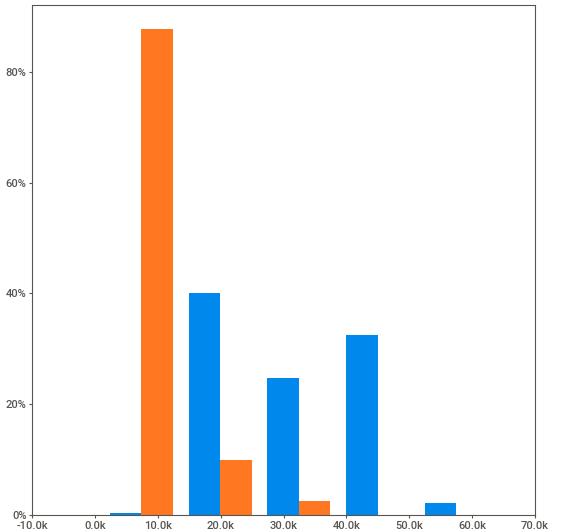
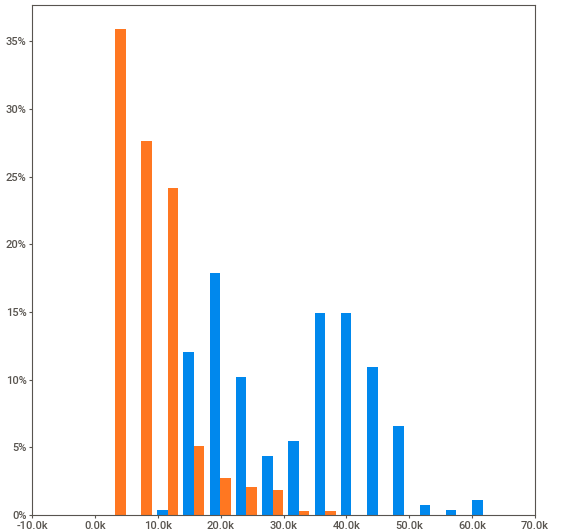
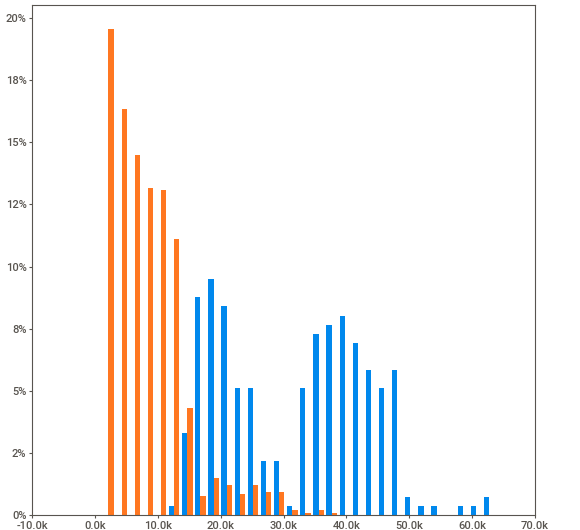
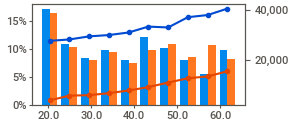
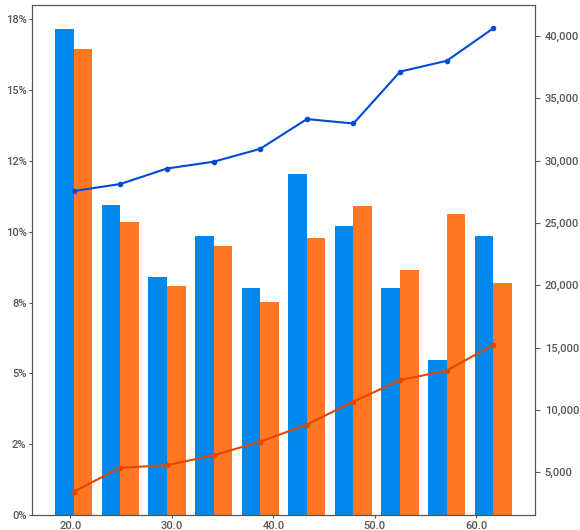
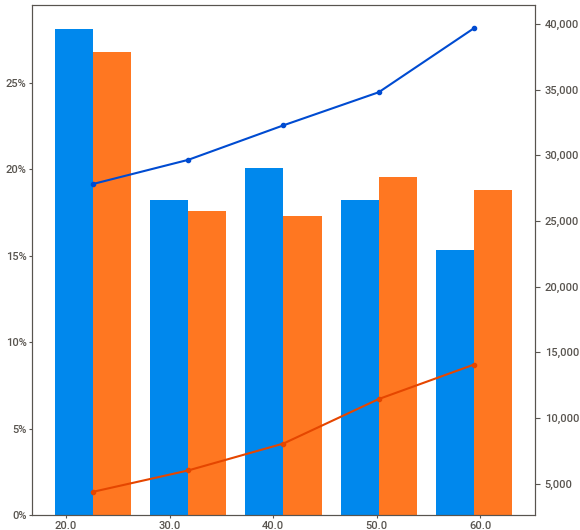
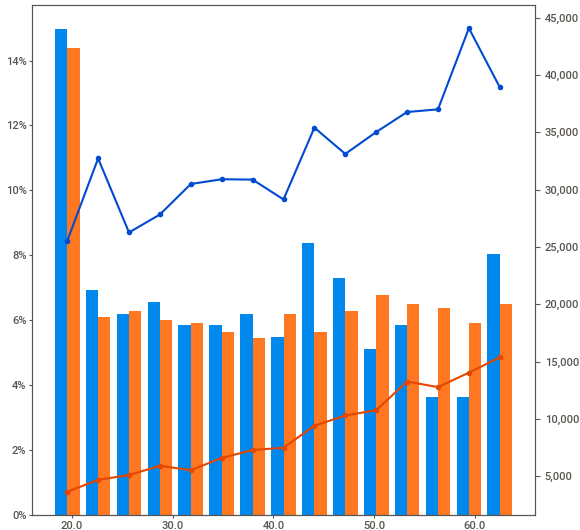
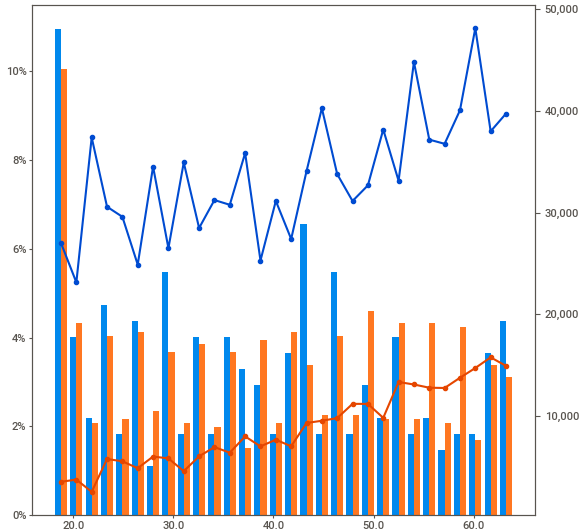
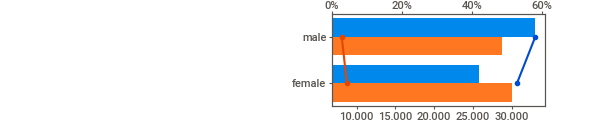
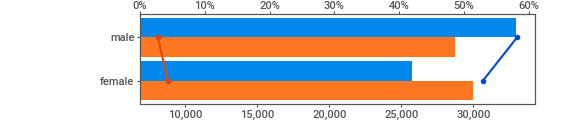
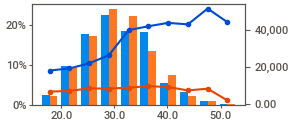
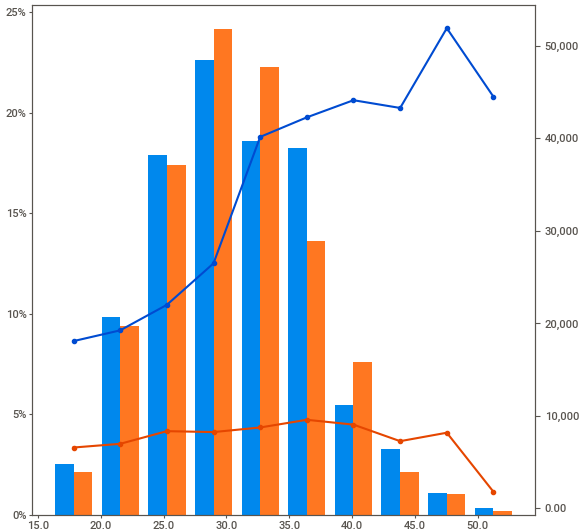
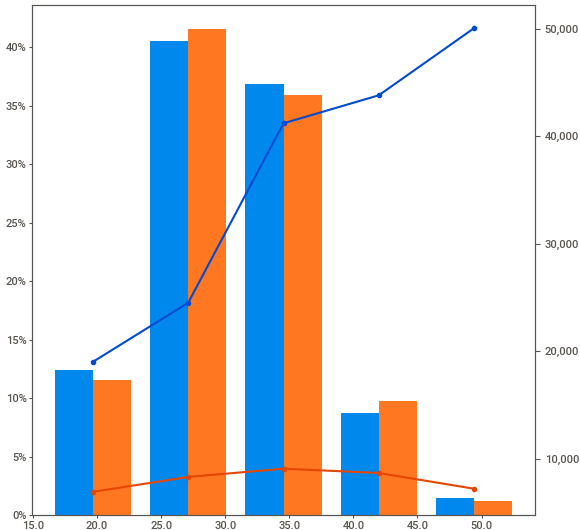
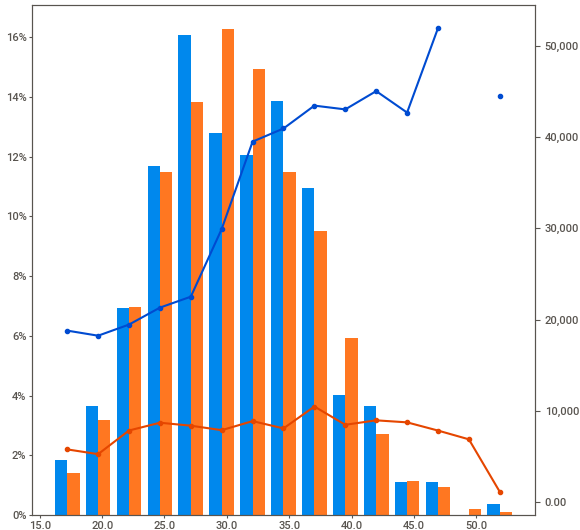
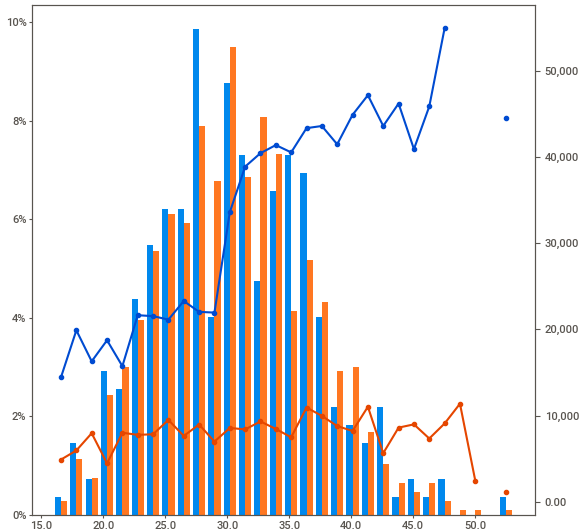
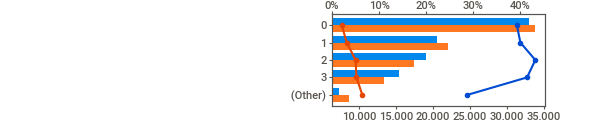
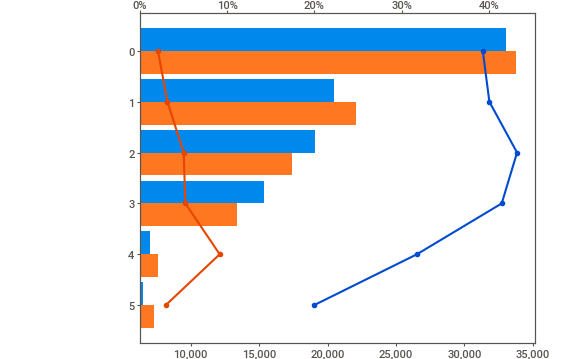
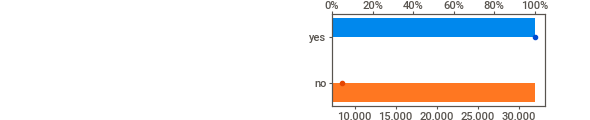
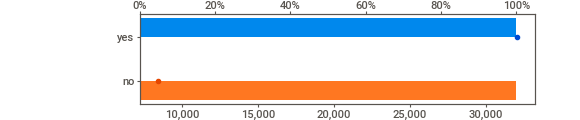
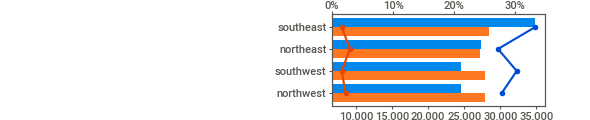
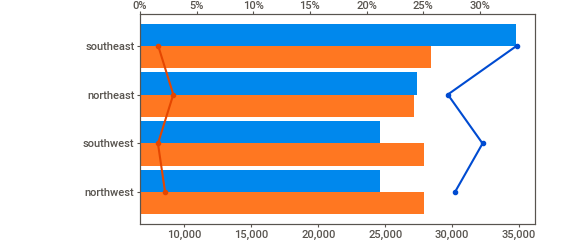
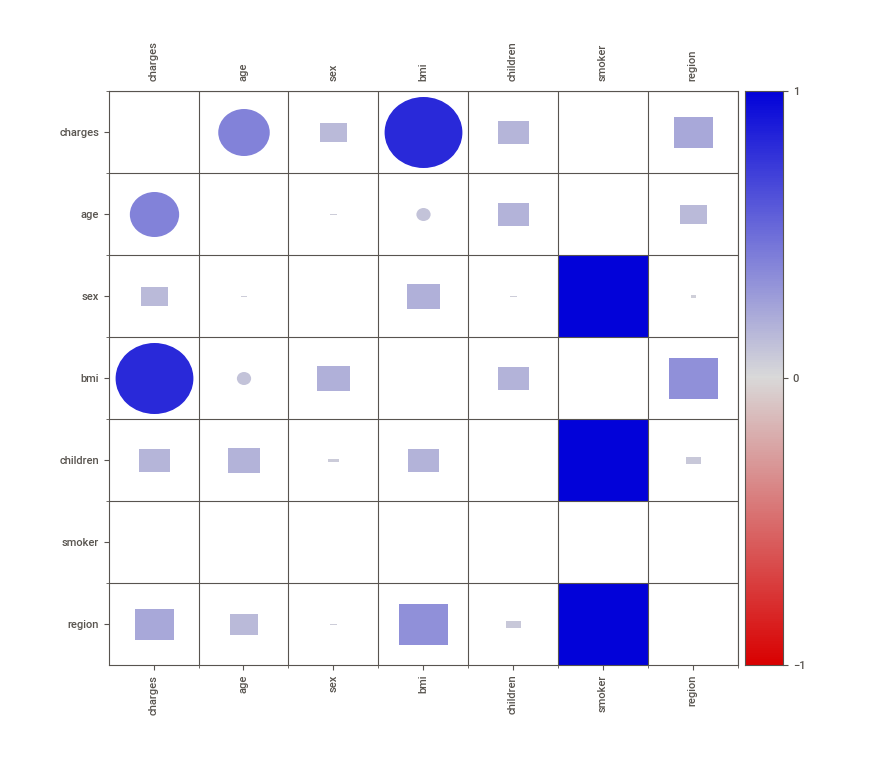
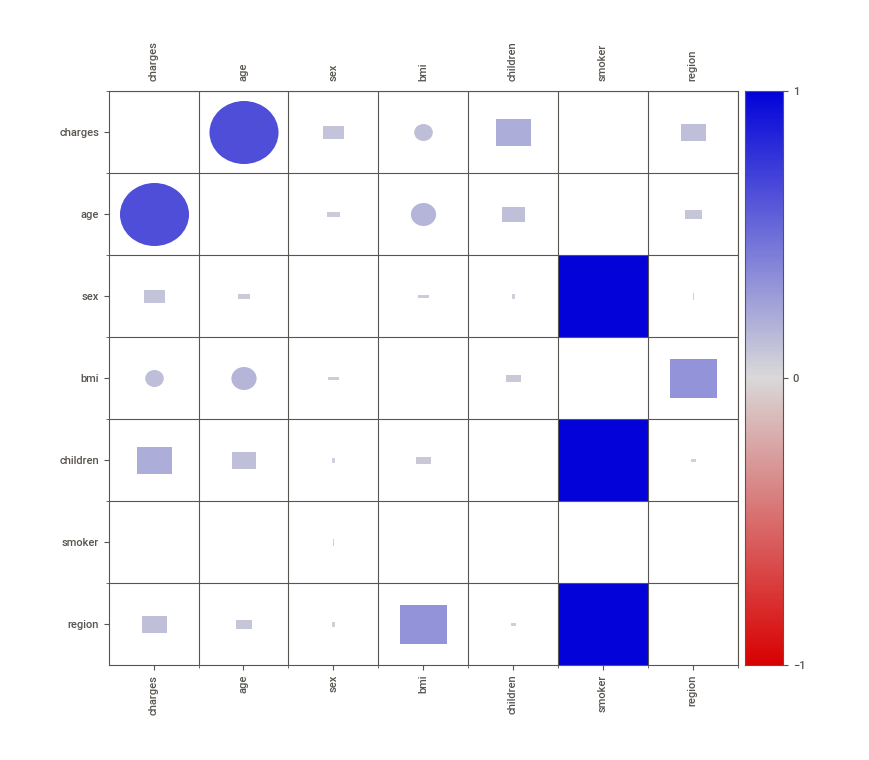

In [ ]:
eda2.show_notebook()

Depois de analisar este relatório, já é possível concluir algumas características importantes no conjunto, como por exemplo a correlação entre as variáveis `smoker` e `charges`. Ou ainda, perceber que quanto maior a idade, maior o custo informado. O relatório nos traz muitas outras informações valiosas, mas por enquanto, vamos guardar estas duas principalmente.

Esta análise é muito importante para o processo. É a partir dela, que vamos conseguir enxergar possíveis variáveis respostas, possíveis correlaçoes, e várias possibilidades de aperfeiçoar nosso modelo. Contudo, para seguir nosso artigo com objetivo de entender, basicamente, este tipo de modelagem,  vamos seguir no processo de criação do modelo.

#*Mise en place*: Ajustar os dados

> Créditos ao Professor Ricardo, pelo nome da etapa.



Para que os dados possam ser usados em uma regressão linear, é importante que eles atendam a certos requisitos:
* As variáveis devem ser numéricas: todas as variáveis utilizadas no modelo, precisam ser do tipo numérica,
* Linearidade: os dados devem estar relacionados linearmente. Isso pode ser verificado plotando um gráfico de dispersão entre as variáveis para ver se há uma tendência linear - este gráfico já foi construido na fase de análise exploratória.
* Normalidade: Os dados devem seguir uma distribuição normal para garantir a precisão dos resultados da regressão linear. A normalidade pode ser verificada plotando um histograma dos dados, que também já foi gerado na sessão anterior.
* Homocedasticidade: Os dados devem ter uma variância constante em toda a faixa de valores das variáveis independentes, ou seja, precisam estar em escalas parecidas.
* Independência: As observações dos dados devem ser independentes entre si. Ou seja, uma observação não deve ser afetada pela observação anterior ou posterior.

Se os dados atenderem a esses requisitos, é possível usá-los em uma regressão linear. É importante lembrar que a regressão linear é uma técnica estatística poderosa, mas é essencial que os dados sejam cuidadosamente analisados e preparados antes de serem usados para evitar resultados imprecisos ou enganosos. 

Vamos por exemplo, mapear a variável smoker para 0 ou 1 para que tenhamos variáveis numéricas. A coluna regiona não será alterada neste momento.

Para esta transformação, vamos usar o método `map()` para mapear as opções `yes` e `no` em 1 e 0, respectiviamente.

In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1 ,'no': 0})
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


Outro ponto muito claro nestes dados, é o valor muito alto da variável `charges`, uma característica que pode afetar negativamente o nosso modelo. Por isso, é preciso "reduzir" esta escala para que fique mais próxima dos outros valores, respeitando a homocedasticidade  dos dados. Para este caso, vamos utilizar o valor de cada linha divido por 1000.

In [ ]:
dados['charges'] = dados['charges']/1000
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16.884924
1,18,male,33.770,1,0,southeast,1.725552
2,28,male,33.000,3,0,southeast,4.449462
3,33,male,22.705,0,0,northwest,21.984471
4,32,male,28.880,0,0,northwest,3.866855


Agora que já ajustamos os dados, vamos deixar nosso conjunto apenas com as variáveis que serão usadas *incialmente*:

In [ ]:
dados = dados[['bmi',"smoker",'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


Como resultado das transformações feitas acima, temos um conjunto de dados com condições razoáveis para este ensaio. Para completar nossa análise exploratória, vamos observar um gráfico de dispersão entre as variáveis `bmi` e `charges`, classificadas pela variável `smoker`

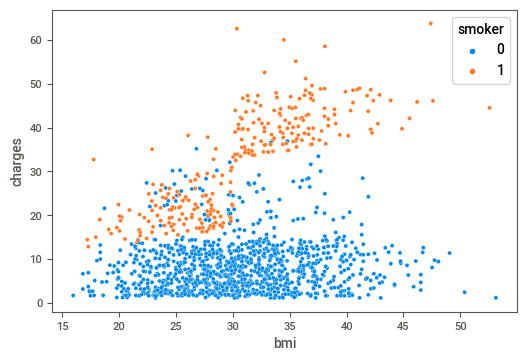

In [ ]:
import seaborn as sns
sns.scatterplot (x = dados['bmi'], y = dados['charges'], hue = dados['smoker']);

Com o gráfico podemos perceber que o comportamento dos pontos onde `smoker`é 0 é muito diferente dos ponto onde a variável tem valor 1. Isso pode indicar que a variável é relevante para o nosso modelo.

#Modelo de ML (🤩🚀)

A Regressão linear pode ser modelada com uma ou mais variáveis preditoras. Vamos anlisar, neste estudo, a aplicação com uma variável apenas e com duas.

##Modelo com uma variável preditora

A regressão com uma variável preditora, também conhecida como regressão simples, é um método estatístico que examina a relação entre uma variável dependente e uma única variável independente. A regressão simples é frequentemente usada para prever ou modelar uma variável dependente a partir de uma única variável independente.

Inicialmente, vamos importar a biblioteca que foi desenvolvida para a aplicação da Regressão Linear.

In [ ]:
from sklearn.linear_model import LinearRegression

Agora é preciso separar as variáveis preditoras e resposta. Essas variáveis serão utilizadas como paramêtro, vamos usar o método `fit()`.

Após a execução do método fit(), o modelo de regressão linear é treinado nos dados de treinamento e seus parâmetros são ajustados para minimizar a soma dos erros quadrados entre os valores previstos e os valores observados.

In [ ]:
#Modelo para prever CHARGES por BMI

X = dados[['bmi']] #Variáveis preditoras, usa dois colchetes para que seja retornado um conjunto de dados em uma só coluna, objeto necessário para a regressão
y= dados['charges'] #Variável Resposta

regressao = LinearRegression()
regressao.fit(X,y) #Treinamento do modelo

LinearRegression()

Para este cenário, o modelo de regressão linear é dado por: **CUSTOS = b0 + b1 * BMI**, onde b0 será o `intercep_`e o b1 é dados por `coef_[posição do coeficiente desejado]`. Vamos conhecer estes coeficientes:

In [ ]:
#Coeficientes:
print('b0 = ', regressao.intercept_)
print('b1 = ', regressao.coef_ [0]) #o coeficiente está na posição 0 deste array

b0 =  1.1929372089611512
b1 =  0.3938730307973951


Com os dados acima, entende-se que o custo pode ser previsto (considerando a escala de ser /1000) aplicando os valores na fómula de **CUSTOS**, citada anteriormente:

> 1.19 + 0.39*BMI

Po exemplo, vamos considerar um BMI de 20:

In [ ]:
1.19 + 0.39*20

8.99

Já sabemos como os coeficientes são definidos e como podem ser utilizados de forma tradicional. Mas pensando em problemas maiores, com cálculos mais complexos, a biblioteca já traz uma função de predição: `predict()`. 

O método predict() é utilizado após a execução do método fit() para treinar o modelo de regressão linear e ajustar seus parâmetros.

A função predict() requer uma entrada principal: os novos valores da variável independente para os quais se deseja prever a variável dependente. Os novos valores da variável independente podem ser passados para a função como uma matriz numpy ou um dataframe pandas, que utilizaremos a seguir.


In [ ]:
novos = pd.DataFrame({'bmi': [15,20,28,33]}) #Criar um novo dataFrame
regressao.predict(novos) #Novas predições

array([ 7.10103267,  9.07039782, 12.22138207, 14.19074723])

Pelo código já sabemos como funciona, mas como ver essa reta tão falada até aqui? Vamos plotar um gráfico que mostra de forma mais clara o ajuste que o modelo faz.

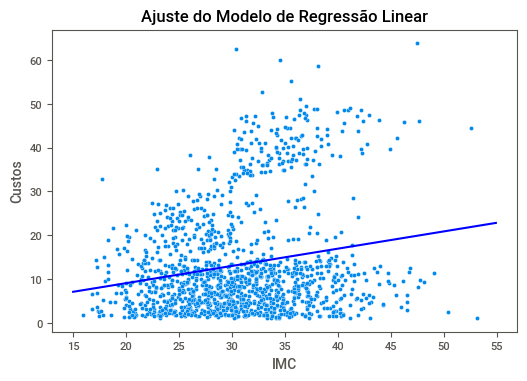

In [ ]:
# Gráfico do Ajuste

b0 = regressao.intercept_
b1 = regressao.coef_

import numpy as np
pontos_em_x = np.arange(15, 55, 0.1)
pontos_em_y = b0 + b1 * pontos_em_x

sns.scatterplot(x = 'bmi', y = 'charges', data = dados)

import matplotlib.pyplot as plt
plt.plot(pontos_em_x, pontos_em_y, color = 'blue')
plt.title('Ajuste do Modelo de Regressão Linear')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

Esse gráfico nos mostra o quão impreciso está nosso modelo. Percebam que há muitos pontos que não são ao menos tocados pela reta, o que pode indicar que o modelo "acertará" pouco, se colocado em produção.

Visualmente já sabemos que o modelo erra bastante, mas precisamos analisar mais afundo estes erros. Podemos utilizar o erro quadrártico médio, que consiste em extrair a média do quadrados dEle mede a média dos quadrados das diferenças entre os valores previstos pelo modelo e os valores reais da variável dependente. 

Teoricamente, quanto menor o valor do EQM, melhor é o desempenho do modelo de Regressão Linear, indicando que as previsões estão mais próximas dos valores reais da variável dependente.

Vamos calcular esta métrica de forma manual:

In [ ]:
#Erro Quadrático Médio

preditos = regressao.predict(X) #Predizer os valores em alguns dados
eqm = ((y-preditos)**2).mean() #Dimimuir o valor observado do valor predito e tiro a média desses dados
eqm

140.77790009850756

Outra forma de encontrar este valor, é utilizar a biblioteca `sklearn.metrics`e uma de suas funções que é a `mean_squared_error`, passando como parâmetros os valores observados e os preditos:

In [ ]:
from sklearn.metrics import mean_squared_error
eqm1 = mean_squared_error(y, preditos)
eqm1

140.77790009850756

O EQM sozinho não quer dizer muita coisa, mas é uma métrica importante para comparar com outras. Por enquanto, vamos deixar apenas métrica, para entender como funciona. Nos próximos modelos, poderemos explorar mais métricas, ou até refazer este, quando apredermos mais sobre o assunto.

É importante validar nossos modelos, mas como fazer isso? Veremos a seguir.


###Como validar o modelo?

Podemos usar a Holdout: dividir o conjunto de dados, de forma aleatória, em treino (parte maior) e teste (parte menor para verificar a eficiência do modelo).

O conjunto de treinamento é utilizado para ajustar os parâmetros do modelo de Regressão Linear, enquanto o conjunto de teste é utilizado para avaliar o desempenho do modelo em dados não vistos. O objetivo é verificar se o modelo consegue generalizar bem para dados não vistos e não apenas memorizar os dados de treinamento, para evitar tanto o underfitting quanto overftting.

Para aplicar o método é preciso importar da biblioteca `sklearn.model_selection` o método `train_test_split`.

In [ ]:
#Técnica Holdout
from sklearn.model_selection import train_test_split 

A divisão dos dados em conjuntos de treinamento e teste é feita aleatoriamente, geralmente com uma proporção de 70/30 ou 80/20 para treinamento e teste, respectivamente. É prossível definir um valor para esta proporção, sinalizando no parâmetro `test_size`a proporção do conjunto de teste. 

A execução deste método vai gerar 4 grupos, sendo dois de treino e dois de teste, dentro dos conjuntos informados no método.

In [ ]:
#Os dois conjuntos são divididos em teste e treino, sendo 25% dos dados reservados para teste, gerando então 4 grupos
train_test_split(X, y, test_size= 0.25) 

[         bmi
 1297  26.510
 927   20.100
 7     27.740
 1285  24.320
 962   35.200
 ...      ...
 359   20.790
 621   34.100
 556   33.440
 1172  41.910
 318   27.645
 
 [1003 rows x 1 columns],          bmi
 1015  25.460
 264   38.060
 1090  36.190
 826   31.790
 354   38.280
 ...      ...
 33    28.310
 724   27.075
 162   39.600
 1051  26.410
 41    36.630
 
 [335 rows x 1 columns], 1297     4.340441
 927     12.032326
 7        7.281506
 1285     8.534672
 962     14.474675
           ...    
 359      1.607510
 621     40.182246
 556      8.334590
 1172    11.093623
 318      7.421195
 Name: charges, Length: 1003, dtype: float64, 1015    12.124992
 264     20.462998
 1090    41.676081
 826     43.813866
 354     14.133038
           ...    
 33      13.770098
 724     10.106134
 162     10.450552
 1051    14.394558
 41       4.949759
 Name: charges, Length: 335, dtype: float64]

Vamos melhorar esse código, utilizando a atribuição múltipla para definir os 4 grupos e já seguir com os 4 principais passos do processo:
* Dividir os dados
* Ajustar a regressão no conjunto de treino (treinar o modelo)
* Testar o modelo no conjunto de teste
* Calcular o erro


O retorno do método `mean_squared_error ()`, é exatamente o EQM que calculamos anteriomente. Aqui definimos este método em uma função, apenas para facilitar a execução do exercício proposto. 

In [ ]:
def EQM(a,b):
  eqm =  mean_squared_error(a, b)
  return eqm

A seguir, vamos executar os 4 passos do processo para criar o modelo.

In [ ]:
#Dividir os dados
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size= 0.25) 

#Ajustar a regressão nos conjuntos de treino:
regressao.fit(Xtreino, ytreino)

#Testar o modelo no conjunto de teste
preditos1 = regressao.predict(Xteste)

#Calcular o erro
eqm2 = EQM(yteste, preditos1)

eqm2

130.12614848539306

É sempre importante lembrar que, como não definmos no método de separação dos dados, o parâmetro para evitar que a divisão seja aleatória - `random_state()`, este valor será sempre diferente. 

O ideal é definir este parâmetro apenas para casos educacionais para que não se perca a caracterísitca da aleatoriedade na divisão dos dados, e que os resultados possam ser reproduzidos.



###Exercício Proposto
Faça repetições da técnica Holdout, de maneira a variar os dados que são sorteados para o conjunto de treino e teste. Guarde os resultados do EQM para cada repetição e, no final, calcule sua média para obter uma valor mais estável para o EQM.

In [ ]:
from statistics import mean
eqm_ = []
for i in range(5): 
  Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size= 0.25) 
  #Ajustar a regressão nos conjuntos de treino:
  regressao.fit(Xtreino, ytreino)

  #Testar o modelo no conjunto de teste
  preditos1 = regressao.predict(Xteste)

  #Calcular o erro
  eqm_.append(EQM(yteste, preditos1).round(1))
  print(eqm_[i])
  
print("EQM: ",mean(eqm_))


147.7
136.3
127.6
151.4
133.3
EQM:  139.26


Para validar a divisão com 75% dos dados para treino, vejamos os tamanhos dos conjuntos de dados:

In [ ]:
print(Xtreino.shape)
print(Xteste.shape)

(1003, 1)
(335, 1)


Para este modelo, podemos concluir que encontramos uma boa saída. Mas podemos melhorar esta predição? Vamos gerar o mesmo modelo, mas agora passando mais de uma variável preditora.

##Modelo com mais de uma variável preditora

In [ ]:
#Modelo para prever CHARGES por BMI

X = dados[['bmi', 'smoker']] #Variáveis preditoras, usa dois colchetes para que seja retornado um conjunto de dados em uma só coluna, objeto necessário para a regressão
y= dados['charges'] #Variável Resposta

regressao = LinearRegression()
regressao.fit(X,y) #Treinamento do modelo

LinearRegression()

Para este cenário, o modelo de regressão linear é dado por: **CUSTOS = b0 + b1 * BMI + b2 * SMOKER**, onde b0 será o `intercep_e` o b1 é dados por `coef_[posição do coeficiente desejado]`:

In [ ]:
#Coeficientes:
b0 = regressao.intercept_
b1 = regressao.coef_ [0] #o primeiro coeficiente é o BMI
b2 = regressao.coef_ [1]
print('b0 = ', regressao.intercept_)
print('b1 = ', regressao.coef_ [0]) #o primeiro coeficiente é o BMI
print('b2 = ', regressao.coef_ [1]) #o primeiro coeficiente é o SMOKER

b0 =  -3.459095520674312
b1 =  0.38801524591853087
b2 =  23.593980998514464


Como já sabemos que podemos fazer essas predições de forma mais prática, vamos aos 4 passos do modelo:

In [ ]:
#Dividir os dados
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size= 0.25) 

#Ajustar a regressão nos conjuntos de treino:
regressao.fit(Xtreino, ytreino)

#Testar o modelo no conjunto de teste
preditos1 = regressao.predict(Xteste)

#Calcular o erro
eqm2 = mean_squared_error(yteste, preditos1)

eqm2

44.4443702761623

Aqui é possível a reução drástica do EQM, apenas aplicando mais uma variável preditora. Assim sendo, entende-se que a quantidade de variáveis preditoras, desde que bem escolhidas, podem melhor o desempenho do modelo.

Para analisar graficamente, vamos verificar como seria o gráfico que representa esta nova equanção, considerando também a nova variável preditora.

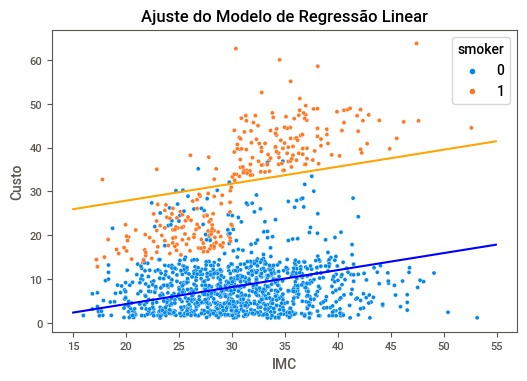

In [ ]:
# Gráfico do Ajuste com DUAS Variáveis

x = np.arange(15, 55, 0.1)
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1

sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)
plt.plot(x, y0, color = 'blue')
plt.plot(x, y1, color = 'orange')
plt.title('Ajuste do Modelo de Regressão Linear')
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()

###Exercício Proposto
Faça repetições da técnica Holdout, de maneira a variar os dados que são sorteados para o conjunto de treino e teste. Guarde os resultados do EQM para cada repetição e, no final, calcule sua média para obter uma valor mais estável para o EQM.

In [ ]:
eqm_ = []
for i in range(5): 
  Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size= 0.25) 
  #Ajustar a regressão nos conjuntos de treino:
  regressao.fit(Xtreino, ytreino)

  #Testar o modelo no conjunto de teste
  preditos1 = regressao.predict(Xteste)

  #Calcular o erro
  eqm_.append(EQM(yteste, preditos1).round(1))
  print(eqm_[i])
  
print("EQM: ",mean(eqm_))

46.9
46.6
49.4
51.7
43.7
EQM:  47.660000000000004


#Conclusão

Ao fim deste notebook, podemos perceber claramente que é muito importante conhecer os dados que estamos lidando para saber quais as variáveis podem ser as melhores para nosso modelo, e para isso devemos fazer uma boa análise exploratória, conhecendo os tipos de variáveis, os valores nulos, as correlações existentes, a qualidade dos dados. 

Esse processo, se bem feito, ajuda a saber as devidas correções que precisam ser feitas nos dados, como fizemos, por exemplo, transofrmando variáveis em numéricas ou ajustando a escala. 

Com esses ajustes, ao executar o modelo, é preciso validar e analisar suas métricas. Para o nosso modelo, que é de regressão linear e a equação resulta em uma reta, podemos ver, com os gráficos, que o nível de acerto foi baixo. Por isso, seria interessante testar outros modelos ou outras variáveis preditoras. 

Assim sendo, entemos que a regressão linear, um algoritmo de ML, baseado em aprendizado supervisioado que é muito útil para prever valores reais, como foi nosso caso, que buscamos um modelo que consiga prever os valores de planos de saúde.